<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Opencv line segment detector(LSD)

In [ ]:
!pip install svgwrite
!pip install ezdxf svgpathtools

In [ ]:
# /content/drive/MyDrive/DATASETS/gsck1.png


# int	refine = LSD_REFINE_STD,
# double	scale = 0.8,
# double	sigma_scale = 0.6,
# double	quant = 2.0,
# double	ang_th = 22.5,
# double	log_eps = 0,
# double	density_th = 0.7,
# int	n_bins = 1024

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import svgwrite
import ezdxf
import svgpathtools
from google.colab import files

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/gsck1.png',cv2.IMREAD_GRAYSCALE)

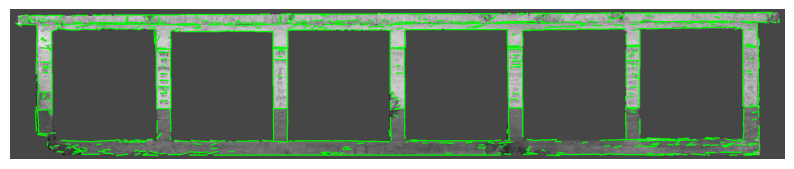

In [ ]:
# Load image (upload your own or use a sample)
image_path = "/content/drive/MyDrive/DATASETS/gsck1.png"  # Change this to your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create LSD detector
lsd = cv2.createLineSegmentDetector(0)

# Detect lines
lines = lsd.detect(img)[0]

# Convert grayscale to BGR for visualization
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Draw detected lines
for line in lines:
    x1, y1, x2, y2 = map(int, line[0])
    cv2.line(img_color, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


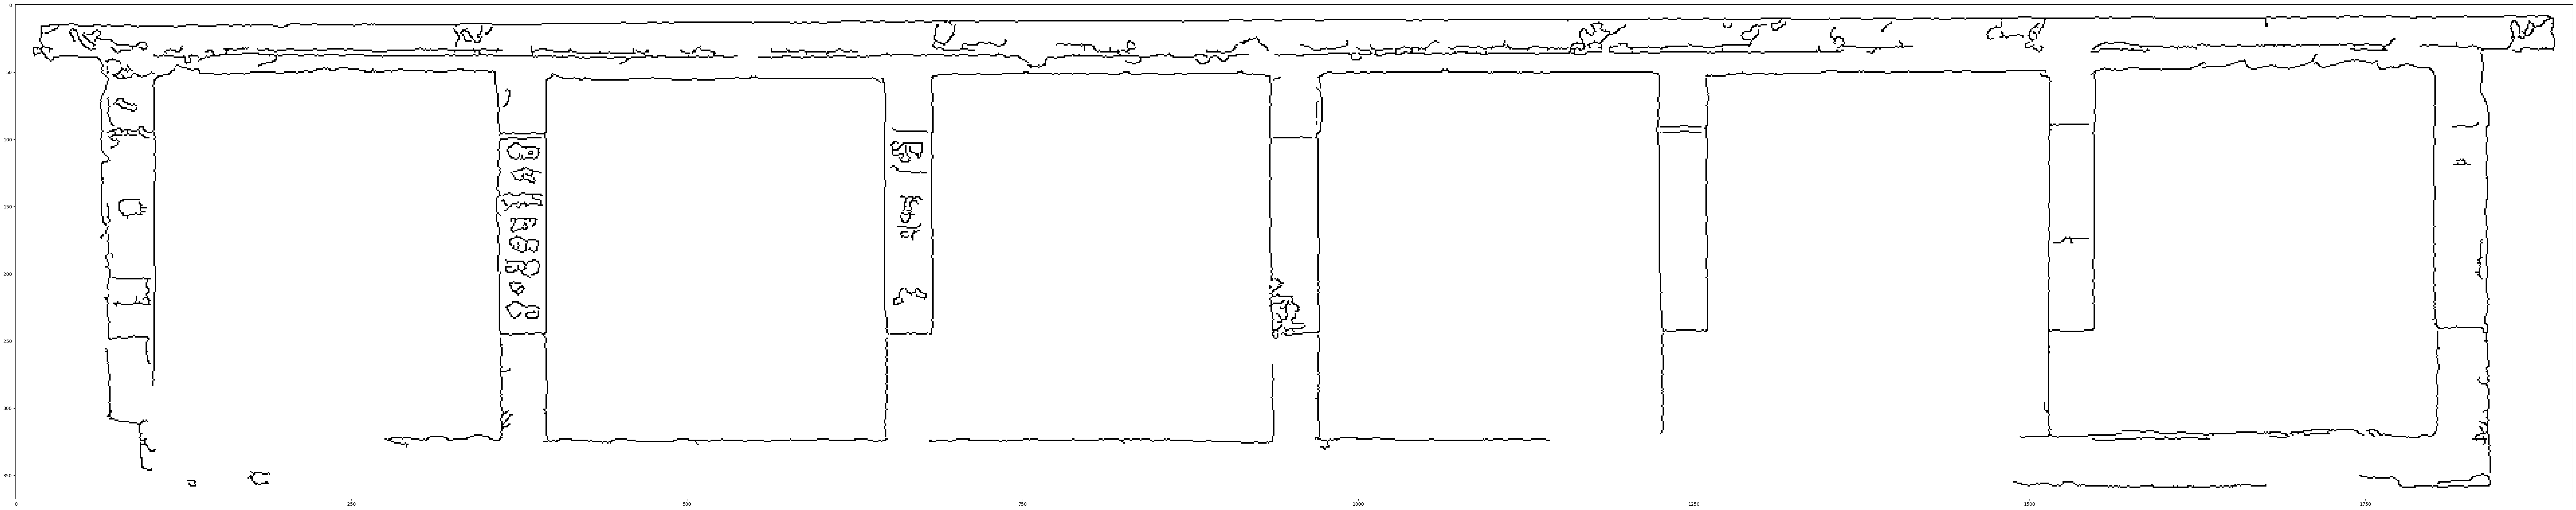

In [ ]:
#kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
kernel = np.ones((1,1), np.uint8)

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,40,120)

dilated = cv2.dilate(im1, kernel, iterations=1)

eroded = cv2.erode(im1, kernel, iterations=1)

dilated = cv2.dilate(eroded, kernel2, iterations=1)

plt.figure(figsize=(100, 50))
plt.imshow(dilated,cmap='gray')

##Default LSD

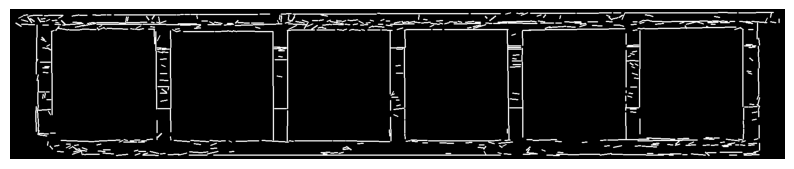

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (upload your own or use a sample)
# image_path = "/content/drive/MyDrive/DATASETS/gsck1.png"  # Change this to your image path
# img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#img = dilated.copy()
# Create LSD detector

img1=dilated.copy()
lsd = cv2.createLineSegmentDetector(0)

# Detect lines
lines = lsd.detect(img)[0]

# Create a black image of the same size
lines_img = np.zeros_like(img1)

# Draw detected lines in white
for line in lines:
    x1, y1, x2, y2 = map(int, line[0])
    cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)  # White lines on black background

# Show results
plt.figure(figsize=(10, 10))
plt.imshow(lines_img, cmap="gray")
plt.axis("off")
plt.show()

# Save the lines image (optional)
cv2.imwrite("lines_output.jpg", lines_img)


##Custom/Tuned LSD

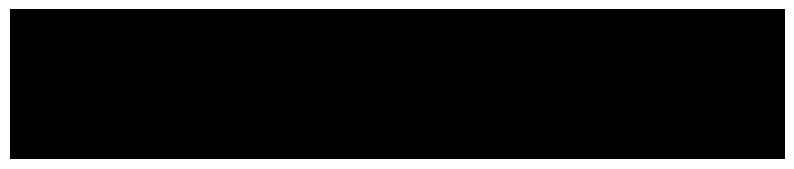

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/DATASETS/gsck1.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Tuned LSD Detector
#https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gae0bba3b867a5f44d1b823aef4f57ee8d
lsd = cv2.createLineSegmentDetector(
    refine=cv2.LSD_REFINE_ADV,
    scale=1.8,
    sigma_scale=1.9,
    quant=2.0,
    ang_th=45.0,
    density_th=0.7
)

# Detect lines
lines = lsd.detect(img)[0]

# Create an empty image
lines_imgC = np.zeros_like(img)

# Draw white lines on a black background
for line in lines:
    x1, y1, x2, y2 = map(int, line[0])
    cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)

# Display results
plt.figure(figsize=(10, 10))
plt.imshow(lines_imgC, cmap="gray")
plt.axis("off")
plt.show()


##

##JPG TO SVG

In [ ]:
# Load the image
# image = eroded.copy()
image=dilated.copy()
#image = img.copy()
#image = 255- lines_img.copy()

# Convert to binary (assuming black line on white background)
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create SVG
dwg = svgwrite.Drawing('filled_contours.svg', profile='tiny')

# Fill the contours instead of just outlining them
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour) + " Z"
    dwg.add(dwg.path(d=path_data, fill="black", stroke="none"))  # Filled black shape

#dwg.save()
print("SVG saved as filled_contours.svg")


# Apply erosion to shrink the filled shapes
kernel = np.ones((1,1), np.uint8)  # 3x3 kernel
eroded = cv2.erode(binary, kernel, iterations=3)  # Adjust iterations as needed

# Save the eroded image for debugging
#cv2.imwrite("eroded.png", eroded)


# Find contours again after erosion
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new SVG for the thinned result
dwg = svgwrite.Drawing('thinned_lines.svg', profile='tiny')

# Draw only the thinned (eroded) contours as a line
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour)
    dwg.add(dwg.path(d=path_data, stroke="black", fill="none"))

dwg.save()
print("SVG saved as thinned_lines.svg")

# Load the SVG file
svg_file = "thinned_lines.svg"
paths, attributes = svgpathtools.svg2paths(svg_file)

# Determine SVG bounding box (height)
svg_height = max(max(seg.start.imag, seg.end.imag) for path in paths for seg in path)

# Create a new DXF document
doc = ezdxf.new()
msp = doc.modelspace()

# Convert SVG paths to DXF polylines (flip Y-axis)
for path in paths:
    dxf_points = [(seg.start.real, svg_height - seg.start.imag) for seg in path]  # Flip y-coordinates
    if dxf_points:
        msp.add_lwpolyline(dxf_points, close=False)  # Creates a lightweight polyline

# Save DXF file
dxf_file = "output.dxf"
doc.saveas(dxf_file)

# Automatically download the DXF file
files.download(dxf_file)

print(f"DXF file '{dxf_file}' downloaded successfully (Y-axis flipped)!")


SVG saved as filled_contours.svg
SVG saved as thinned_lines.svg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DXF file 'output.dxf' downloaded successfully (Y-axis flipped)!


In [ ]:
# Load the SVG file
svg_file = "thinned_lines.svg"
paths, attributes = svgpathtools.svg2paths(svg_file)

# Determine SVG bounding box (height)
svg_height = max(max(seg.start.imag, seg.end.imag) for path in paths for seg in path)

# Create a new DXF document
doc = ezdxf.new()
msp = doc.modelspace()

# Convert SVG paths to DXF polylines (flip Y-axis)
for path in paths:
    dxf_points = [(seg.start.real, svg_height - seg.start.imag) for seg in path]  # Flip y-coordinates
    if dxf_points:
        msp.add_lwpolyline(dxf_points, close=False)  # Creates a lightweight polyline

# Save DXF file
dxf_file = "output.dxf"
doc.saveas(dxf_file)

# Automatically download the DXF file
files.download(dxf_file)

print(f"DXF file '{dxf_file}' downloaded successfully (Y-axis flipped)!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DXF file 'output.dxf' downloaded successfully (Y-axis flipped)!
